<a href="https://colab.research.google.com/github/JavierPachas/ml-projects/blob/main/ml1_intro_basic_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
!pip3 install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 5.3 MB/s eta 0:00:00


In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import IPython
import mglearn
from IPython.display import display
import sklearn

%matplotlib notebook
#inline
import sys

In [39]:
print('system version: {}'.format(sys.version))
print('pandas version: {}'.format(pd.__version__))
#print('matplotlib version: {}'.format(plt.__version__))
print('Numpy version: {}'.format(np.__version__))
print('Scipy version: {}'.format(sp.__version__))
print('IPython version: {}'.format(IPython.__version__))
print('scikit-learn version: {}'.format(sklearn.__version__))

system version: 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
pandas version: 1.5.3
Numpy version: 1.23.5
Scipy version: 1.10.1
IPython version: 7.34.0
scikit-learn version: 1.2.2


In [1]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [6]:
print('Keys of iris_dataset:\n {}'.format(iris_dataset.keys()))

Keys of iris_dataset:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [21]:
print(iris_dataset['DESCR'][19:220] + "\n...")

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the 
...


In [22]:
print('Target names: {}'.format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [23]:
print('Feature names: \n{}'.format(iris_dataset['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [24]:
print('Data type: {}'.format(type(iris_dataset['data'])))

Data type: <class 'numpy.ndarray'>


In [25]:
print('Shape of data: {}'.format(iris_dataset['data'].shape))

Shape of data: (150, 4)


In [28]:
print('First ten columns of data:\n{}'.format(iris_dataset['data'][:10]))

First ten columns of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [29]:
print('Type of target: {}'.format(type(iris_dataset['target'])))

Type of target: <class 'numpy.ndarray'>


In [30]:
print('Shape of target: {}'.format(iris_dataset['target'].shape))

Shape of target: (150,)


In [31]:
print('Target:\n{}'.format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [34]:
#The meanings of the numbers are given by the iris_dataset['target_names'] array:
#0 means setosa, 1 means versicolor, and 2 means virginica.

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state =0)

In [36]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))


X_train shape: (112, 4)
y_train shape: (112,)


In [37]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))


X_test shape: (38, 4)
y_test shape: (38,)


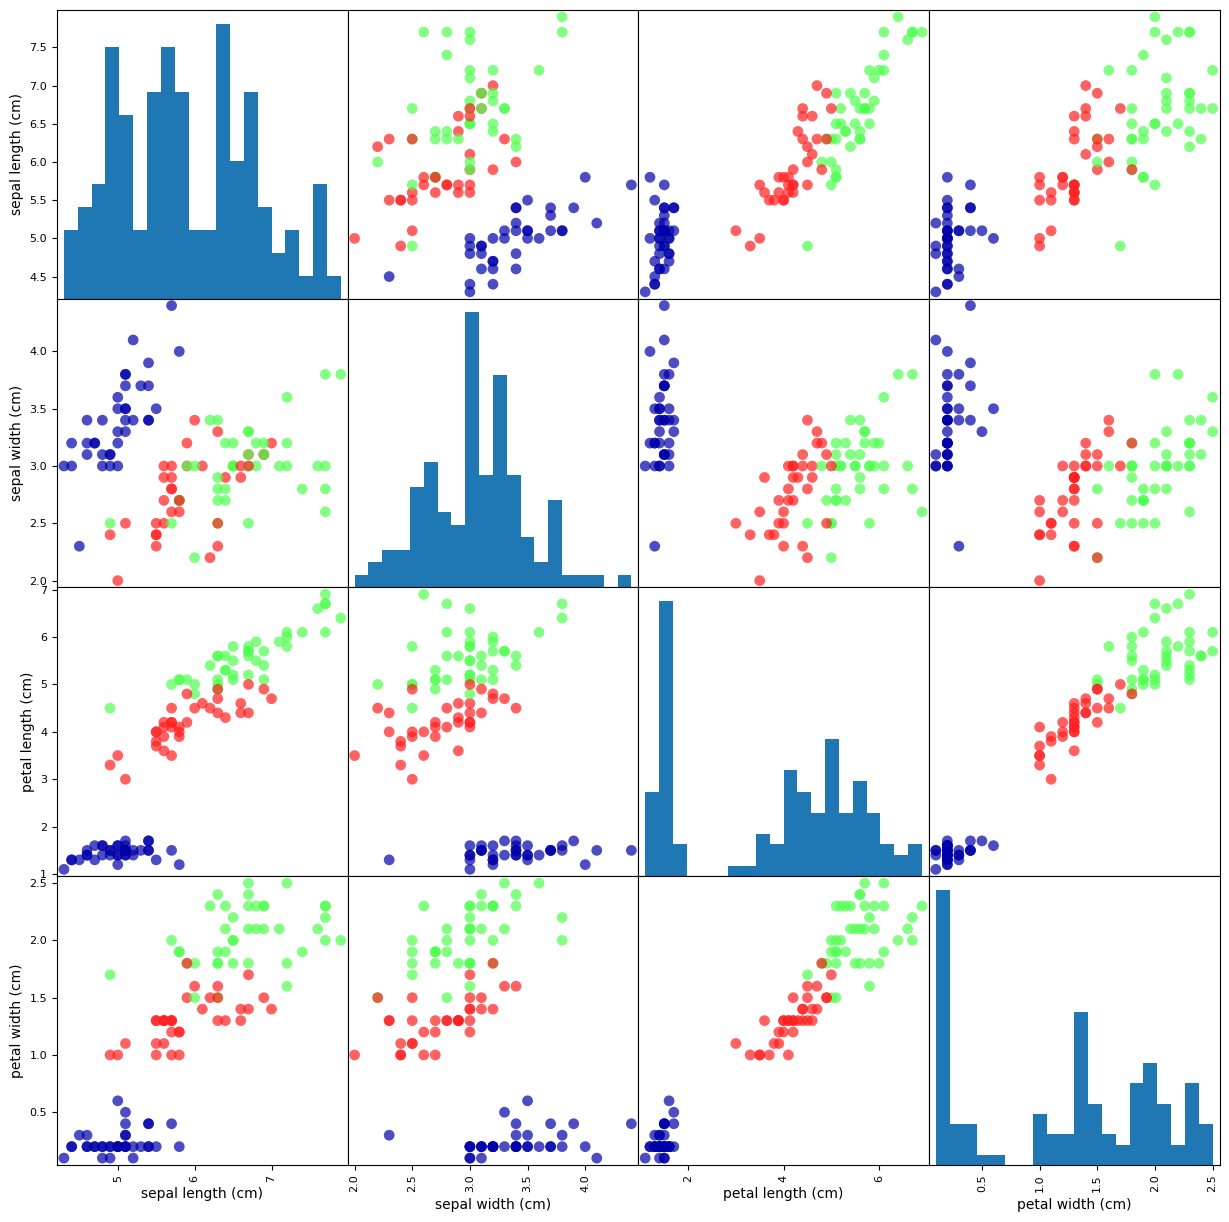

In [60]:
%matplotlib inline
#from pandas.plotting import scatter_matrix
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.7, cmap=mglearn.cm3)
plt.show()

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)


In [64]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [65]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))
#Note that we made the measurements of this single flower into a row in a
#two-dimensional NumPy array, as scikit-learn always expects two-dimensional arrays for the data.

X_new.shape: (1, 4)


In [66]:
prediction = knn.predict(X_new)
print('Prediction: {}'.format(prediction))
print('Predicted target name: {}'.format(iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


In [67]:
y_pred = knn.predict(X_test)
print('Test set predictions:\n {}'.format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [68]:
print('Test set score: {:.2f}'.format(np.mean(y_test == y_pred)))

Test set score: 0.97


In [69]:
# another way
print('Test set score: {:.2f}'.format(knn.score(X_test, y_test)))

Test set score: 0.97
